In [1]:
from math import sqrt
import os
import glob

from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import lstm2
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


### This notebook shows how we train a small number of stocks to predict the next 30 day price

# 1. Use stock data only

In [2]:
source_dir='../data/sp500_test'
nlp_dir = None #'../data/nlp_by_company'
revenue_dir = None
models_dir = '../models/sp500_test/'
supervised_data_dir = '../data/sup_sp500_test'
prediction_data_dir = '../data/prediction/sp500_test'
rmse_csv = '../data/rsme_ltsm.csv'
# look back n days. Note: The hight n_lags is, the more overfitting it becomes 
# because there are more features added with the fix number of data we currently have.
# When we add more features later, we may have to cut down n_lags even more
n_lags = 5 
n_forecast = 30 
n_test = 90 # test = last 90 days from data
'''
config_file = '../config/lstm2.config'
source_dir, models_dir, supervised_data_dir, prediction_data_dir, rmse_csv,n_lags, n_forecast, n_test = lstm2.read_config(config_file)
'''
n_features, orig_dfs, datasets = lstm2.set_up_data(source_dir, 
                                                   nlp_dir, 
                                                   revenue_dir,
                                                   supervised_data_dir, 
                                                   n_lags, 
                                                   n_forecast)
n_features

MSFT
../data/sp500_test/MSFT.csv has 4493 rows
              Volume  Adj Close
Date                           
2000-01-03  53228400  38.903194
2000-01-04  54119000  37.589046
2000-01-05  64059600  37.985374
2000-01-06  54976600  36.712940
2000-01-07  62013600  37.192707
(4459, 12)
('Generating', '../data/sup_sp500_test/MSFT_supervised.csv')
NDAQ
../data/sp500_test/NDAQ.csv has 3869 rows
            Volume  Adj Close
Date                         
2002-07-01    1300  13.694478
2002-07-02    7000  13.813163
2002-07-03   10200  13.694478
2002-07-05     500  13.694478
2002-07-08     300  12.781513
(3835, 12)
('Generating', '../data/sup_sp500_test/NDAQ_supervised.csv')
O
../data/sp500_test/O.csv has 4493 rows
            Volume  Adj Close
Date                         
2000-01-03   98800   3.604251
2000-01-04  119800   3.560825
2000-01-05   96400   3.539115
2000-01-06   64600   3.582541
2000-01-07  137600   3.647675
(4459, 12)
('Generating', '../data/sup_sp500_test/O_supervised.csv')
ORCL
../

2

Data for Q


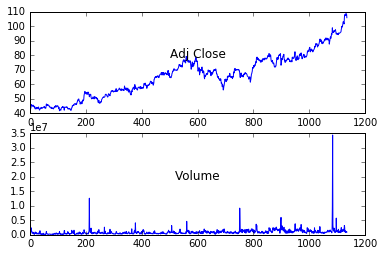

Data for ORCL


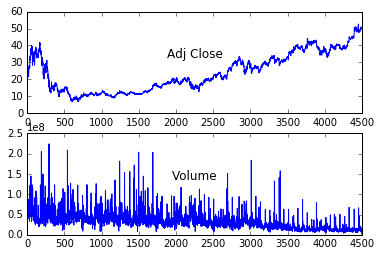

Data for NDAQ


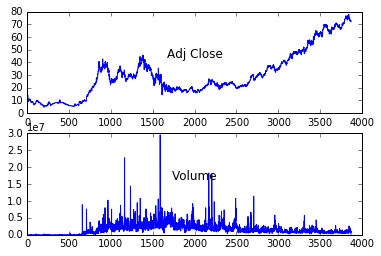

Data for O


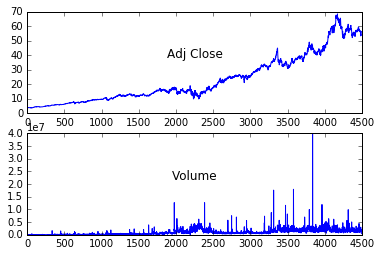

Data for MSFT


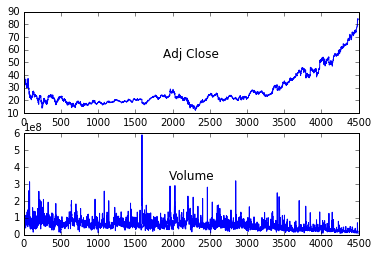

In [3]:
def view_dataframe(df):
    dataset = df
    values = dataset.values
    # Revised order of columns
    groups = np.array(range(len(list(dataset))-1, -1, -1)) #[0, 1, 2, 3, 5] #, 6, 7
    #groups = np.array(range(len(list(dataset)))) #[0, 1, 2, 3, 5] #, 6, 7
    # specify columns to plot
    i = 1
    # plot each column
    for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(dataset.columns[group], y=0.5) #, loc='left')
        i += 1
    pyplot.show()

for stock in orig_dfs.keys():
    pyplot.figure(figsize=(6,4))
    print('Data for ' + stock)
    view_dataframe(orig_dfs[stock])

#view_dataframe(orig_dfs['MSFT'])

# Multiple lag timesteps

In [4]:
histories = lstm2.build_models(supervised_data_dir, models_dir, n_test, n_lags, n_features)

('Processing', 'MSFT')
Train on 4369 samples, validate on 90 samples
Epoch 1/30
4369/4369 [==============================] - 4s - loss: 0.0285 - val_loss: 0.0433
Epoch 2/30
4369/4369 [==============================] - 4s - loss: 0.0265 - val_loss: 0.0526
Epoch 3/30
4369/4369 [==============================] - 4s - loss: 0.0259 - val_loss: 0.0325
Epoch 4/30
4369/4369 [==============================] - 4s - loss: 0.0258 - val_loss: 0.0404
Epoch 5/30
4369/4369 [==============================] - 4s - loss: 0.0255 - val_loss: 0.0705
Epoch 6/30
4369/4369 [==============================] - 4s - loss: 0.0254 - val_loss: 0.0367
('Saving model to', '../models/sp500_test/MSFT.h5')
('Processing', 'NDAQ')
Train on 3745 samples, validate on 90 samples
Epoch 1/30
3745/3745 [==============================] - 4s - loss: 0.0394 - val_loss: 0.0298
Epoch 2/30
3745/3745 [==============================] - 4s - loss: 0.0338 - val_loss: 0.0388
Epoch 3/30
3745/3745 [==============================] - 4s - loss:

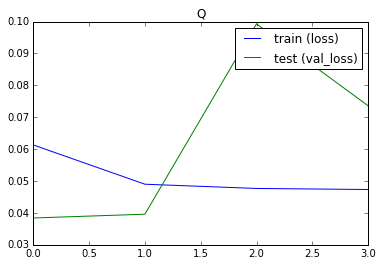

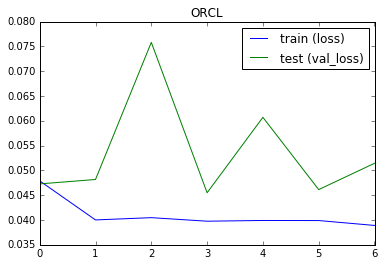

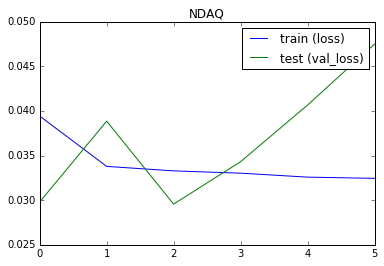

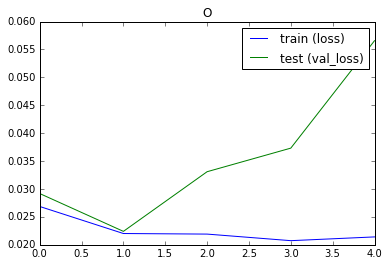

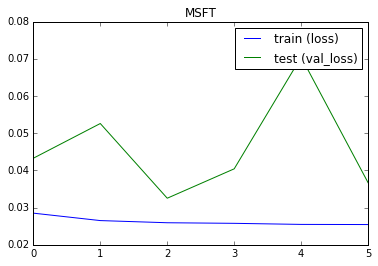

In [5]:
#print(histories)
for stock in histories.keys(): # plot history
    history = histories[stock]
    plt.plot(history.history['loss'], label='train (loss)')
    plt.plot(history.history['val_loss'], label='test (val_loss)')
    plt.title(stock)
    plt.legend()
    plt.show()

In [6]:
predicted_dfs, rmse_df = lstm2.predict_evaluate(models_dir, 
                                                supervised_data_dir, 
                                                prediction_data_dir, 
                                                rmse_csv, 
                                                n_test, n_lags, n_features, n_forecast)

../models/sp500_test/*.h5
('loading', '../models/sp500_test/MSFT.h5')
('Reading', '../data/sup_sp500_test/MSFT_supervised.csv')
Predicting...
Test RMSE: 3.478
('Writing to', '../data/prediction/sp500_test/MSFT_predicted.csv')
('loading', '../models/sp500_test/NDAQ.h5')
('Reading', '../data/sup_sp500_test/NDAQ_supervised.csv')
Predicting...
Test RMSE: 3.935
('Writing to', '../data/prediction/sp500_test/NDAQ_predicted.csv')
('loading', '../models/sp500_test/O.h5')
('Reading', '../data/sup_sp500_test/O_supervised.csv')
Predicting...
Test RMSE: 3.969
('Writing to', '../data/prediction/sp500_test/O_predicted.csv')
('loading', '../models/sp500_test/ORCL.h5')
('Reading', '../data/sup_sp500_test/ORCL_supervised.csv')
Predicting...
Test RMSE: 3.264
('Writing to', '../data/prediction/sp500_test/ORCL_predicted.csv')
('loading', '../models/sp500_test/Q.h5')
('Reading', '../data/sup_sp500_test/Q_supervised.csv')
Predicting...
Test RMSE: 5.961
('Writing to', '../data/prediction/sp500_test/Q_predicte

In [7]:
def plot_data(rmse_df, predicted_dfs):
    cnt = 1
    for index, row in rmse_df.iterrows():
        key = row['Stock Model']
        if (cnt % 2 != 0):
            fig, axes = plt.subplots(nrows=1, ncols=2)
            ax=axes[0]
        else:
            ax=axes[1]
        predicted_dfs[key].plot(title=key + ': n_forecast = ' + str(n_forecast) +
                                ', n_lags = ' + str(n_lags) + ': price vs days', 
                                figsize=(15,4), 
                                ax=ax)
        cnt += 1
    plt.show()

In [8]:
# default is sort by 'Avg predicted gain'
rmse_df

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,3.477995,-0.002815,0.009204,0.005484,0.042196
4,Q,5.961392,0.008243,0.067273,-0.000589,0.050988
1,NDAQ,3.934759,-0.020004,0.061155,-0.019591,0.023595
3,ORCL,3.263896,-0.014975,0.108223,-0.025086,0.020995
2,O,3.968528,-0.048863,0.027702,-0.054781,0.006778


In [9]:
#rmse_df#.sort_values(by='Day 0 actual gain', ascending=False)

In [10]:
predicted_dfs2, summary_df = lstm2.read_prediction_files(prediction_data_dir)
# Should be exactly the same as rmse_df above
summary_df

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,3.477995,-0.002815,0.009204,0.005484,0.042196
4,Q,5.961392,0.008243,0.067273,-0.000589,0.050988
1,NDAQ,3.934759,-0.020004,0.061155,-0.019591,0.023595
2,ORCL,3.263896,-0.014975,0.108223,-0.025086,0.020995
5,USB,3.210445,-0.043120,0.029322,-0.038322,0.017449
3,O,3.968528,-0.048863,0.027702,-0.054781,0.006778


In [11]:
# Compare 2 dataframes: They should be same
from pandas.util.testing import assert_frame_equal

#assert_frame_equal(rmse_df, summary_df)

for key in predicted_dfs.keys():
    print(key)
    assert_frame_equal(predicted_dfs[key], predicted_dfs2[key])

Q
ORCL
NDAQ
O
MSFT


# Visualize Results

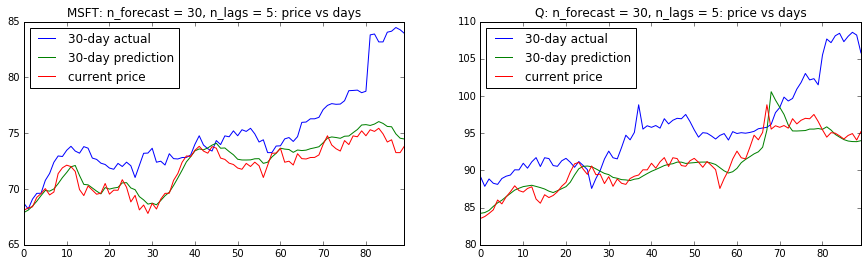

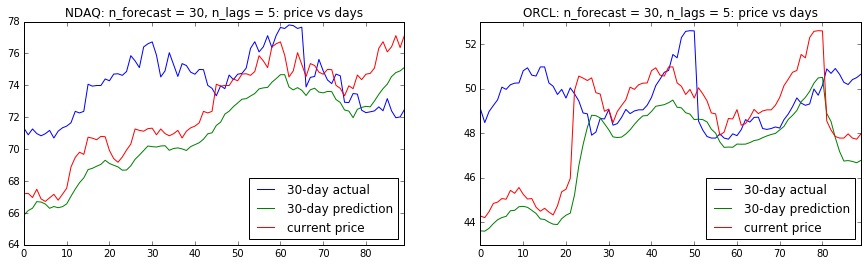

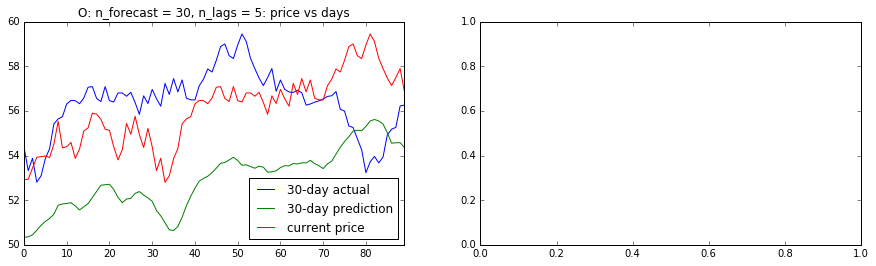

In [12]:
plot_data(rmse_df, predicted_dfs)

# 2. Use stock price, news and revenue data


In [31]:
n_lags = 5
nlp_dir = '../data/nlp_by_company'
revenue_dir = '../metadata/revenue'
n_features, orig_dfs, datasets = lstm2.set_up_data(source_dir, 
                                                   nlp_dir,
                                                   revenue_dir,
                                                   supervised_data_dir, 
                                                   n_lags, 
                                                   n_forecast)

MSFT
../data/sp500_test/MSFT.csv has 4493 rows
              Volume  Adj Close
Date                           
2000-01-03  53228400  38.903194
2000-01-04  54119000  37.589046
2000-01-05  64059600  37.985374
2000-01-06  54976600  36.712940
2000-01-07  62013600  37.192707
('Reading', '../metadata/revenue/MSFT_Financials_by_Quarter.csv')
('Process revenue data', 4493, 4493)
('Reading', '../data/nlp_by_company/MSFT.csv')
            buy  sell  positivity  subjectivity  basiceps  netincome  \
Date                                                                   
2000-01-03  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-04  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-05  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-06  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-07  0.0   0.0         0.0           0.0       0.0        0.0   

            totalrevenue    Volume  Adj Close  
Date                      

# Data Analysis

('Number of features:', 9)
[ 0.  1.]
Data for Q


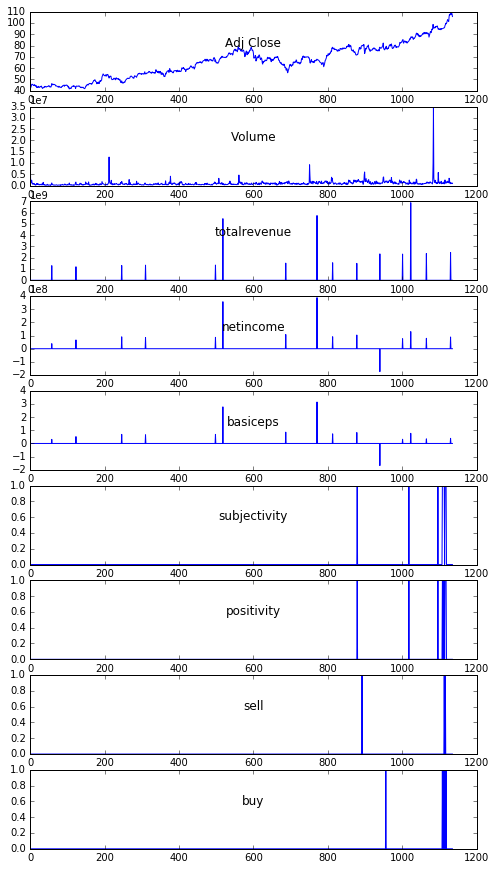

[ 0.  1.]
Data for ORCL


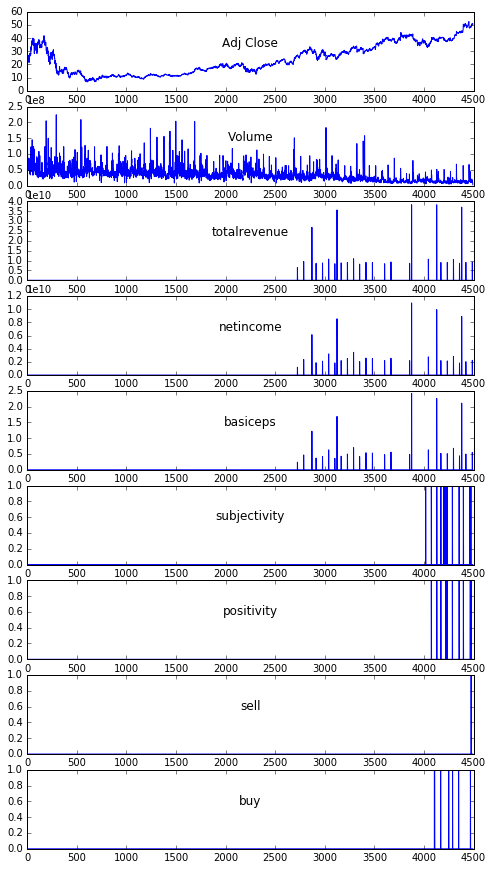

[ 0.  1.]
Data for NDAQ


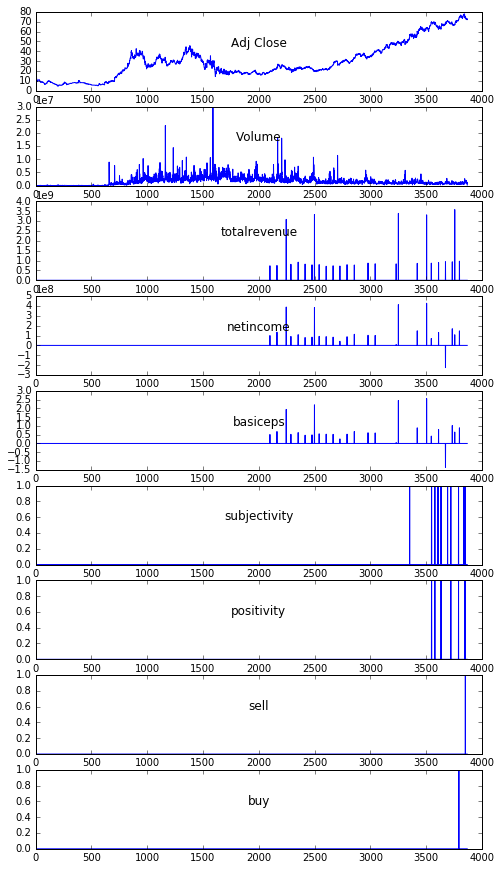

[ 0.  1.]
Data for O


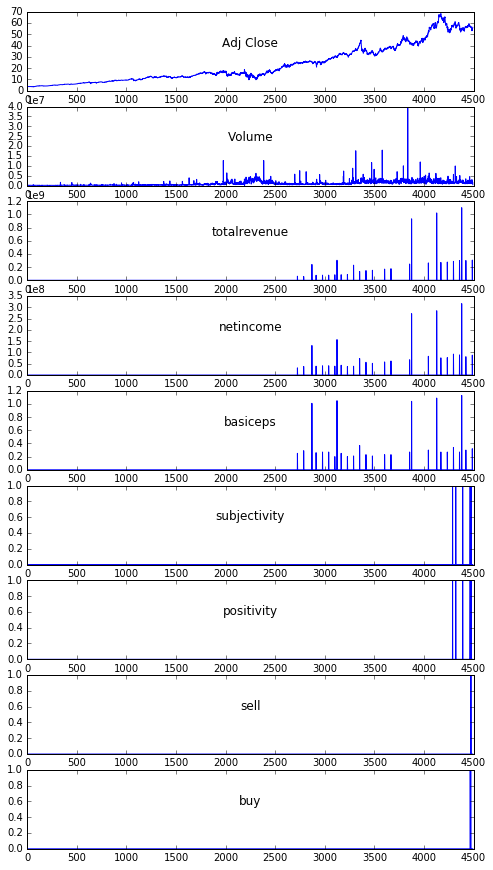

[ 0.  1.]
Data for MSFT


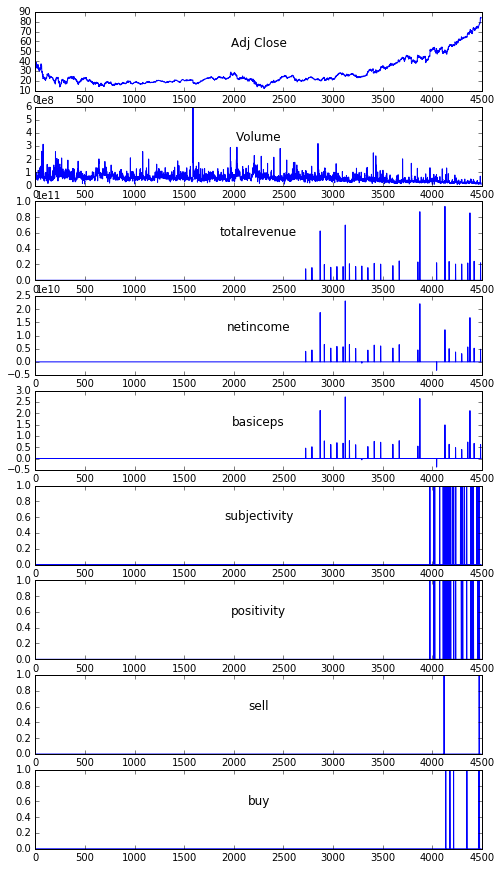

In [32]:
print('Number of features:', n_features)
for stock in orig_dfs.keys():
    pyplot.figure(figsize=(8,15))
#    print(orig_dfs[stock][['decline']].max())
    print(orig_dfs[stock].positivity.unique())
    #.groupby().agg({'decline': ['min', 'max', 'unique'], 'sell': ['first', 'max', 'unique']})
    print('Data for ' + stock)
    view_dataframe(orig_dfs[stock])


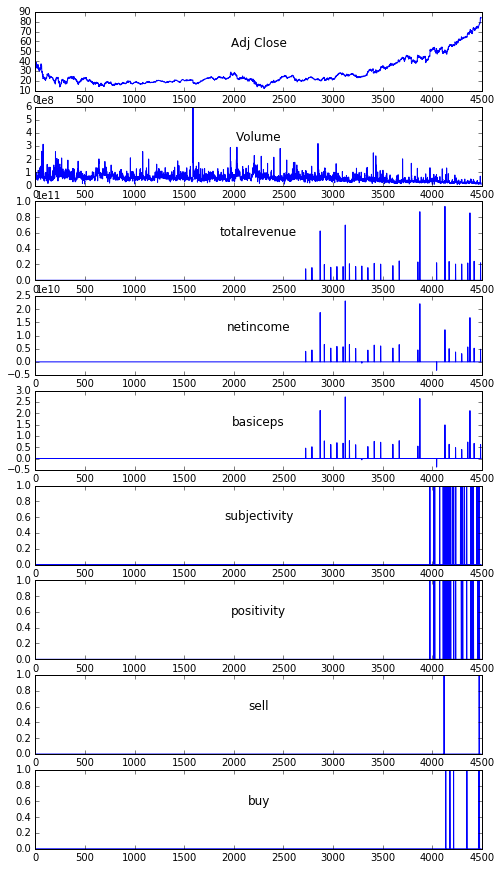

In [33]:
# Just look at 1 stock for simplicity
pyplot.figure(figsize=(8,15))
view_dataframe(orig_dfs['MSFT'])

* Stock data starts from 2000-01
* News data (subjectivity, positivity, decline, sell, buy, scandal) 
    + only available approximately for the past 500 days (ex: MSFT)
    + very sparsed
    + scandal, decline are consistently zero. Should we drop them?
    + buy, sell are sparsed, mostly 0s. Should we drop them?
* Revenue data () start from 2010?
    + totalgrossprofit, operatingrevenue are 0s so we decided to drop them

## Create Models

('Processing', 'MSFT')
Train on 4369 samples, validate on 90 samples
Epoch 1/30
4369/4369 [==============================] - 6s - loss: 0.0291 - val_loss: 0.0937
Epoch 2/30
4369/4369 [==============================] - ETA: 0s - loss: 0.026 - 4s - loss: 0.0265 - val_loss: 0.0567
Epoch 3/30
4369/4369 [==============================] - 4s - loss: 0.0261 - val_loss: 0.0475
Epoch 4/30
4369/4369 [==============================] - 4s - loss: 0.0257 - val_loss: 0.0287
Epoch 5/30
4369/4369 [==============================] - 4s - loss: 0.0256 - val_loss: 0.0397
Epoch 6/30
4369/4369 [==============================] - 4s - loss: 0.0257 - val_loss: 0.0228
Epoch 7/30
4369/4369 [==============================] - 4s - loss: 0.0252 - val_loss: 0.0279
Epoch 8/30
4369/4369 [==============================] - 4s - loss: 0.0252 - val_loss: 0.0419
Epoch 9/30
4369/4369 [==============================] - 4s - loss: 0.0248 - val_loss: 0.0225
Epoch 10/30
4369/4369 [==============================] - 4s - loss: 0.

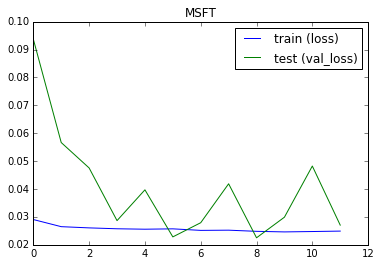

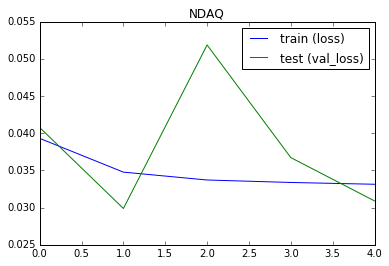

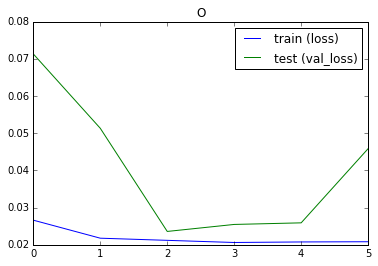

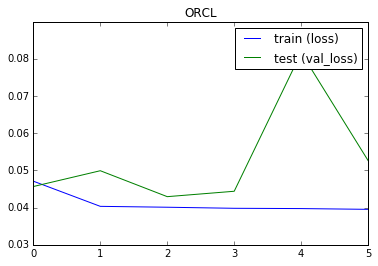

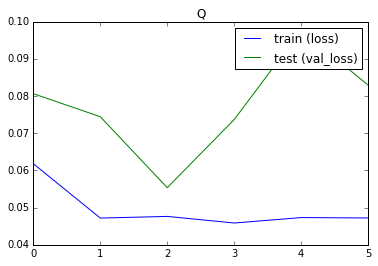

In [34]:
histories = lstm2.build_models(supervised_data_dir, models_dir, n_test, n_lags, n_features)
#print(histories)
for stock in sorted(histories.keys()): # plot history
    history = histories[stock]
    plt.plot(history.history['loss'], label='train (loss)')
    plt.plot(history.history['val_loss'], label='test (val_loss)')
    plt.title(stock)
    plt.legend()
    plt.show()

## Make Predictions

In [35]:
predicted_dfs2, rmse_df2 = lstm2.predict_evaluate(models_dir, 
                                                supervised_data_dir, 
                                                prediction_data_dir, 
                                                rmse_csv, 
                                                n_test, n_lags, n_features, n_forecast)


../models/sp500_test/*.h5
('loading', '../models/sp500_test/MSFT.h5')
('Reading', '../data/sup_sp500_test/MSFT_supervised.csv')
Predicting...
Test RMSE: 2.724
('Writing to', '../data/prediction/sp500_test/MSFT_predicted.csv')
('loading', '../models/sp500_test/NDAQ.h5')
('Reading', '../data/sup_sp500_test/NDAQ_supervised.csv')
Predicting...
Test RMSE: 2.579
('Writing to', '../data/prediction/sp500_test/NDAQ_predicted.csv')
('loading', '../models/sp500_test/O.h5')
('Reading', '../data/sup_sp500_test/O_supervised.csv')
Predicting...
Test RMSE: 3.267
('Writing to', '../data/prediction/sp500_test/O_predicted.csv')
('loading', '../models/sp500_test/ORCL.h5')
('Reading', '../data/sup_sp500_test/ORCL_supervised.csv')
Predicting...
Test RMSE: 3.476
('Writing to', '../data/prediction/sp500_test/ORCL_predicted.csv')
('loading', '../models/sp500_test/Q.h5')
('Reading', '../data/sup_sp500_test/Q_supervised.csv')
Predicting...
Test RMSE: 6.637
('Writing to', '../data/prediction/sp500_test/Q_predicte

In [36]:
# check RMSE as risk indicators
rmse_df2

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,2.724310,0.021553,0.009204,0.032933,0.042196
1,NDAQ,2.578754,0.014435,0.061155,0.014069,0.023595
4,Q,6.637477,-0.008149,0.067273,-0.008354,0.050988
3,ORCL,3.476213,-0.008021,0.108223,-0.019883,0.020995
2,O,3.266753,-0.033055,0.027702,-0.038369,0.006778


In [37]:
# Compare to the previous one
rmse_df

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,3.477995,-0.002815,0.009204,0.005484,0.042196
4,Q,5.961392,0.008243,0.067273,-0.000589,0.050988
1,NDAQ,3.934759,-0.020004,0.061155,-0.019591,0.023595
3,ORCL,3.263896,-0.014975,0.108223,-0.025086,0.020995
2,O,3.968528,-0.048863,0.027702,-0.054781,0.006778


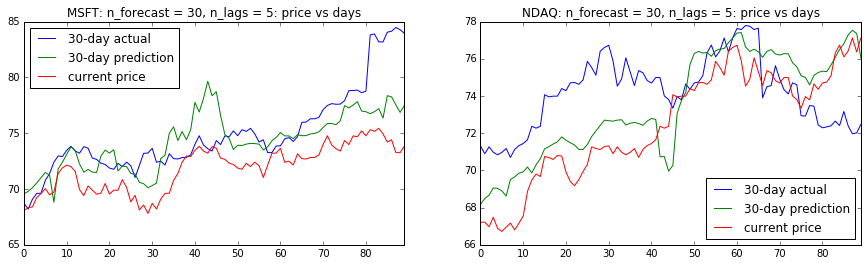

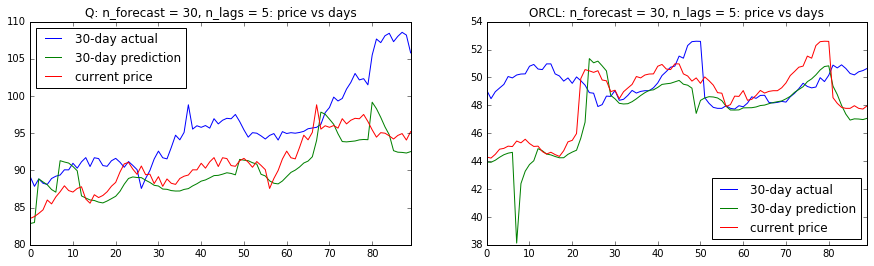

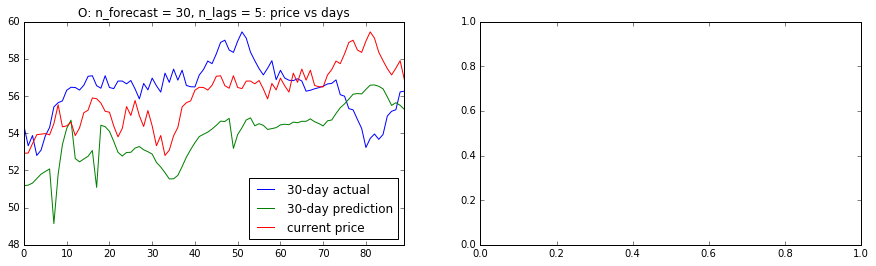

In [38]:
plot_data(rmse_df2, predicted_dfs2)

# Observations:

* The new set of predictions with news and revenue data look better the first set

Let's try to increase n_lags to see overfitting improves

## Increase n_lags 

In [45]:
n_lags = 10 # look back 10 days
n_features, orig_dfs, datasets = lstm2.set_up_data(source_dir, 
                                                   nlp_dir, 
                                                   revenue_dir,
                                                   supervised_data_dir, 
                                                   n_lags, 
                                                   n_forecast)
n_features

MSFT
../data/sp500_test/MSFT.csv has 4493 rows
              Volume  Adj Close
Date                           
2000-01-03  53228400  38.903194
2000-01-04  54119000  37.589046
2000-01-05  64059600  37.985374
2000-01-06  54976600  36.712940
2000-01-07  62013600  37.192707
('Reading', '../metadata/revenue/MSFT_Financials_by_Quarter.csv')
('Process revenue data', 4493, 4493)
('Reading', '../data/nlp_by_company/MSFT.csv')
            buy  sell  positivity  subjectivity  basiceps  netincome  \
Date                                                                   
2000-01-03  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-04  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-05  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-06  0.0   0.0         0.0           0.0       0.0        0.0   
2000-01-07  0.0   0.0         0.0           0.0       0.0        0.0   

            totalrevenue    Volume  Adj Close  
Date                      

9

In [46]:
histories = lstm2.build_models(supervised_data_dir, models_dir, n_test, n_lags, n_features)


('Processing', 'MSFT')
Train on 4364 samples, validate on 90 samples
Epoch 1/30
4364/4364 [==============================] - 10s - loss: 0.0289 - val_loss: 0.0316
Epoch 2/30
4364/4364 [==============================] - 7s - loss: 0.0260 - val_loss: 0.0560
Epoch 3/30
4364/4364 [==============================] - 7s - loss: 0.0260 - val_loss: 0.0356
Epoch 4/30
4364/4364 [==============================] - 7s - loss: 0.0253 - val_loss: 0.0333
('Saving model to', '../models/sp500_test/MSFT.h5')
('Processing', 'NDAQ')
Train on 3740 samples, validate on 90 samples
Epoch 1/30
3740/3740 [==============================] - 9s - loss: 0.0403 - val_loss: 0.0352
Epoch 2/30
3740/3740 [==============================] - 6s - loss: 0.0340 - val_loss: 0.0294
Epoch 3/30
3740/3740 [==============================] - 6s - loss: 0.0330 - val_loss: 0.0461
Epoch 4/30
3740/3740 [==============================] - 6s - loss: 0.0332 - val_loss: 0.0331
Epoch 5/30
3740/3740 [==============================] - 6s - loss

In [47]:
predicted_dfs3, rmse_df3 = lstm2.predict_evaluate(models_dir, 
                                                supervised_data_dir, 
                                                prediction_data_dir, 
                                                rmse_csv, 
                                                n_test, n_lags, n_features, n_forecast)
rmse_df3

../models/sp500_test/*.h5
('loading', '../models/sp500_test/MSFT.h5')
('Reading', '../data/sup_sp500_test/MSFT_supervised.csv')
Predicting...
Test RMSE: 3.152
('Writing to', '../data/prediction/sp500_test/MSFT_predicted.csv')
('loading', '../models/sp500_test/NDAQ.h5')
('Reading', '../data/sup_sp500_test/NDAQ_supervised.csv')
Predicting...
Test RMSE: 2.834
('Writing to', '../data/prediction/sp500_test/NDAQ_predicted.csv')
('loading', '../models/sp500_test/O.h5')
('Reading', '../data/sup_sp500_test/O_supervised.csv')
Predicting...
Test RMSE: 2.261
('Writing to', '../data/prediction/sp500_test/O_predicted.csv')
('loading', '../models/sp500_test/ORCL.h5')
('Reading', '../data/sup_sp500_test/ORCL_supervised.csv')
Predicting...
Test RMSE: 2.397
('Writing to', '../data/prediction/sp500_test/ORCL_predicted.csv')
('loading', '../models/sp500_test/Q.h5')
('Reading', '../data/sup_sp500_test/Q_supervised.csv')
Predicting...
Test RMSE: 7.427
('Writing to', '../data/prediction/sp500_test/Q_predicte

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,3.151532,-0.002585,0.009204,0.021679,0.042196
3,ORCL,2.397418,0.029700,0.108223,0.011976,0.020995
1,NDAQ,2.834011,-0.000047,0.061155,0.002978,0.023595
2,O,2.261322,0.013835,0.027702,0.001028,0.006778
4,Q,7.427185,-0.013736,0.067273,-0.014538,0.050988


In [48]:
rmse_df2

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,2.724310,0.021553,0.009204,0.032933,0.042196
1,NDAQ,2.578754,0.014435,0.061155,0.014069,0.023595
4,Q,6.637477,-0.008149,0.067273,-0.008354,0.050988
3,ORCL,3.476213,-0.008021,0.108223,-0.019883,0.020995
2,O,3.266753,-0.033055,0.027702,-0.038369,0.006778


In [49]:
rmse_df

,Stock Model,rsme,Day 0 predicted gain,Day 0 actual gain,Avg predicted gain,Avg actual gain
0,MSFT,3.477995,-0.002815,0.009204,0.005484,0.042196
4,Q,5.961392,0.008243,0.067273,-0.000589,0.050988
1,NDAQ,3.934759,-0.020004,0.061155,-0.019591,0.023595
3,ORCL,3.263896,-0.014975,0.108223,-0.025086,0.020995
2,O,3.968528,-0.048863,0.027702,-0.054781,0.006778


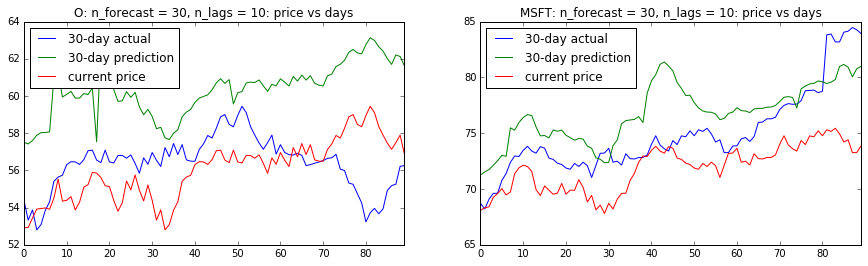

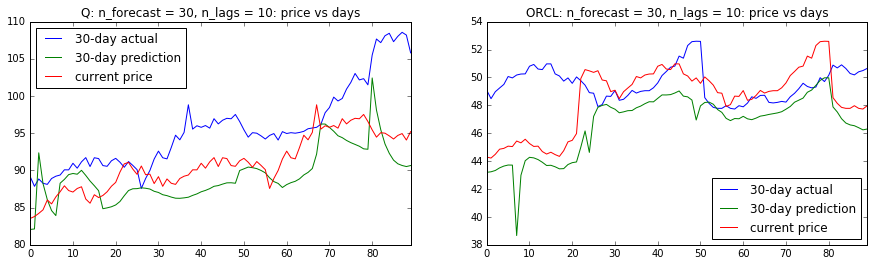

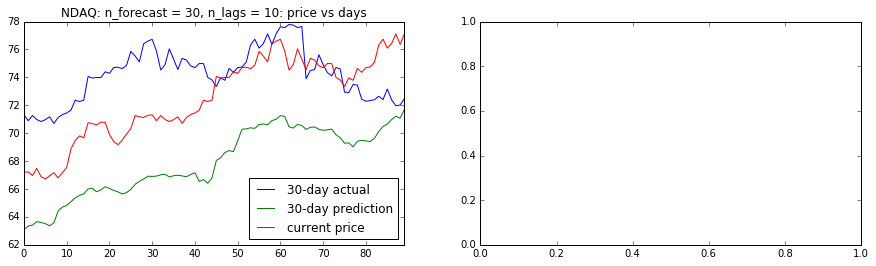

In [44]:
plot_data(rmse_df3, predicted_dfs3)